In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import analysis.lib.purification.purify_ssro as pu_ssro;reload(pu_ssro)
%matplotlib inline

d:\measuring\data
reloaded
d:\measuring\data
reloaded
d:\measuring\data
reloaded
d:\measuring\data


## Repump speed

In [ ]:
### to be written // imported from Qmemory

In [2]:
reload(pu_ssro)
pu_ssro.plot_pos_neg_data(contains = '')

reloaded
d:\measuring\data


AttributeError: 'module' object has no attribute 'plot_pos_neg_data'

## average repump time Z

reloaded
d:\measuring\data
Converged with chi squared  0.141541051099
degrees of freedom, dof  22
RMS of residuals (i.e. sqrt(chisq/dof))  0.0802102495999
Reduced chisq (i.e. variance of residuals)  0.00643368414087

fitted parameters at minimum, with 68% C.I.:
 0 a              0.092946 +/-   0.186458
 1 A              0.721742 +/-   0.173572
 2 x0             0.240119 +/-   0.020035
 3 sigma          0.435273 +/-   0.102503

correlation matrix:
               a         A         x0        sigma     
         a  1.000000
         A -0.986389  1.000000
        x0 -0.027843  0.028417  1.000000
     sigma -0.974318  0.938270  0.024216  1.000000



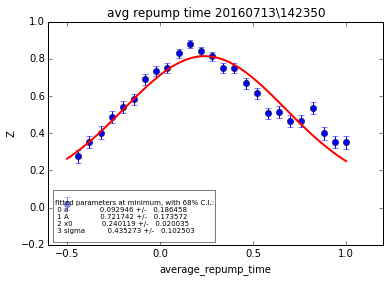

In [390]:
reload(pu_ssro)
pu_ssro.average_repump_time(contains = '_Z',do_fit = True)

## average repump time XY

reloaded
d:\measuring\data
Converged with chi squared  0.0881406060463
degrees of freedom, dof  22
RMS of residuals (i.e. sqrt(chisq/dof))  0.063296059782
Reduced chisq (i.e. variance of residuals)  0.00400639118392

fitted parameters at minimum, with 68% C.I.:
 0 a          -1681.942978 +/-        nan
 1 A           1682.616415 +/-        nan
 2 x0             0.361308 +/-   0.040736
 3 sigma         47.248244 +/-        nan

correlation matrix:
               a         A         x0        sigma     
         a -1.000000
         A  1.000000 -1.000000
        x0       nan       nan  1.000000
     sigma  1.000000 -1.000000       nan -1.000000



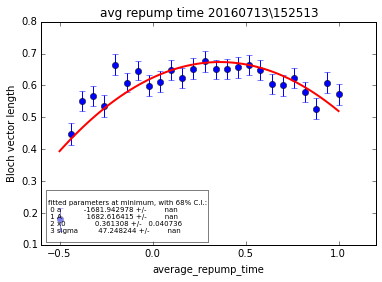

In [393]:
reload(pu_ssro)
pu_ssro.average_repump_time(contains = '_X',do_fit = True)

## Number of repetitions

reloaded
d:\measuring\data
Converged with chi squared  0.0426585221162
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0596227879508
Reduced chisq (i.e. variance of residuals)  0.00355487684302

fitted parameters at minimum, with 68% C.I.:
 0 A              0.843799 +/-   0.037802
 1 T            219.429144 +/-  17.448941
 2 n              1.758039 +/-   0.414440

correlation matrix:
               A         T         n         
         A  1.000000
         T  0.072741  1.000000
         n -0.710977 -0.621975  1.000000



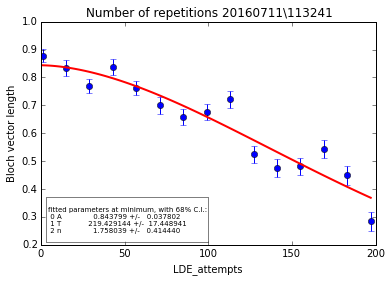

In [145]:
reload(pu_ssro)
pu_ssro.number_of_repetitions(contains = '_X',do_fit = True,fixed=[0,2,5,6])
#pu_ssro.number_of_repetitions(contains = '_Z',do_fit = True,fixed=[0,2,5,6])

## El to C swap

In [14]:
reload(pu_ssro)
pu_ssro.el_to_c_swap(input_el=['X','mX','Y','mY','Z'])

reloaded
d:\measuring\data
this is the timestamp  20160817\125948
                             X                 Y                 Z
--------------------------------------------------------------------------------------------------
               X |     0.04 +/- 0.03    -0.04 +/- 0.02     0.93 +/- 0.01
--------------------------------------------------------------------------------------------------
              mX |    -0.08 +/- 0.03      0.0 +/- 0.02    -0.94 +/- 0.01
--------------------------------------------------------------------------------------------------
               Y |     0.01 +/- 0.03      0.9 +/- 0.01      0.0 +/- 0.02
--------------------------------------------------------------------------------------------------
              mY |     0.02 +/- 0.02    -0.91 +/- 0.01     0.05 +/- 0.02
--------------------------------------------------------------------------------------------------
               Z |    -0.93 +/- 0.01    -0.05 +/- 0.02     0.03 +/- 0.02


## Calibrate LDE phase

reloaded
d:\measuring\data
<HDF5 group "/111no2_SIL2_LDE_phase_calibration/X_positive" (16 members)>
<HDF5 group "/111no2_SIL2_LDE_phase_calibration/X_negative" (16 members)>
Converged with chi squared  0.0156626144539
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0417167891247
Reduced chisq (i.e. variance of residuals)  0.00174029049488

fitted parameters at minimum, with 68% C.I.:
 0 f              0.019325 +/-   0.000258
 1 A              0.920467 +/-   0.030878
 2 phi          -11.991680 +/-   2.626691
 3 t            146.218091 +/-  29.259695

correlation matrix:
               f         A         phi       t         
         f  1.000000
         A -0.093228  1.000000
       phi -0.880149  0.167846  1.000000
         t -0.073984 -0.777554 -0.028495  1.000000

This is the phase detuning 8
acquired phase per repetition (includes phase detuning) 1.043 +/- 0.093
phase offset  -11.992


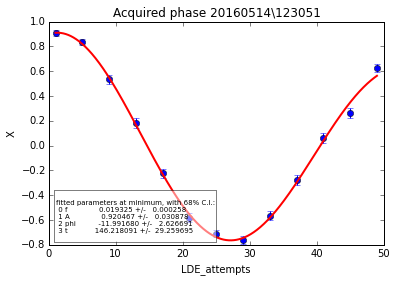

In [17]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(do_fit = True,fixed = [1],show_guess = False, freq = 8/360.)

## Calibrate feedback phase

reloaded
d:\measuring\data
Converged with chi squared  0.00146660339433
degrees of freedom, dof  11
RMS of residuals (i.e. sqrt(chisq/dof))  0.0115467563109
Reduced chisq (i.e. variance of residuals)  0.000133327581302

fitted parameters at minimum, with 68% C.I.:
 0 f              0.048686 +/-   0.000045
 1 A              0.896650 +/-   0.004464
 2 phi           61.073592 +/-   0.551290

correlation matrix:
               f         A         phi       
         f  1.000000
         A  0.008990  1.000000
       phi -0.867413 -0.039769  1.000000

This is the phase detuning 0
Acquired phase per repetition (compensating for phase_detuning=) 17.527 +/- 0.016
phase offset  61.074


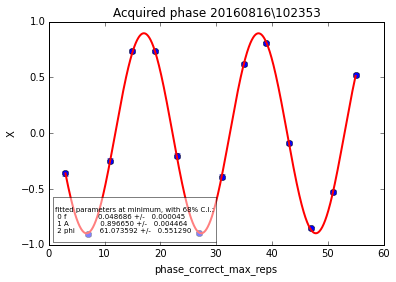

In [10]:
reload(pu_ssro)
pu_ssro.calibrate_LDE_phase(contains = 'phase',do_fit = True,fixed = [1,4],show_guess = False, freq = 16/360.,decay = 50e3)

In [15]:
print 360/16.982 # 2.299
print 360/17.625 # 2.298
360/16.339 # 2.3

21.1989164998
20.4255319149


22.03317216475917

# Apply feedback phase analysis

In [97]:
phase_per_sequence_repetition = (-2.35+(25-6.6)-0.5+0.24)
delta = 40
phase_to_compensate = (305+phase_per_sequence_repetition*1)%360
print phase_to_compensate
phase_per_compensation_repetition = 17.557

phase_acquired = 0
mindev = 361

for x in range(80):
    phase_acquired += phase_per_compensation_repetition
    if phase_acquired > 360:
        phase_acquired -= 360
    
    dev = abs(phase_to_compensate - phase_acquired)
    #print x,dev
    if dev < mindev:
        mindev = dev
        minx = x+1
print mindev
print minx

320.79
3.77
80


reloaded
2
starting fit.fit1d


TypeError: 'int' object has no attribute '__getitem__'

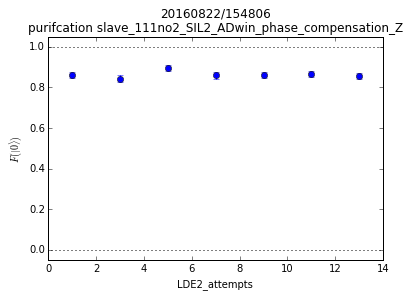

In [23]:
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)

Result = fits.exp_sin(timestamp=  None, contains = 'phase_compensation_Z',
                      offset=[0.5], amplitude = [0.485], center = [0], decay_constant = [350], 
                      exp_power = [2],
                      frequency = [3./360], phase =[0.], 
                      fixed = [0,2,4],
                      ylim = None,
                      plot_fit = True,do_print = True, show_guess = False)
phase_per_point = 360*Result[0]['params_dict']['f']
phase_error =  360*Result[0]['error_dict']['f']
offset = Result[0]['params_dict']['phi']
offset_error = Result[0]['error_dict']['phi']

print phase_per_point,phase_error
print offset, offset_error

# Check phase offset after LDE 2

reloaded
d:\measuring\data
Converged with chi squared  0.00756539238016
degrees of freedom, dof  8
RMS of residuals (i.e. sqrt(chisq/dof))  0.0307518137273
Reduced chisq (i.e. variance of residuals)  0.00094567404752

fitted parameters at minimum, with 68% C.I.:
 0 A             -0.733815 +/-   0.013139
 1 phi          177.479440 +/-   1.133740

correlation matrix:
               A         phi       
         A  1.000000
       phi  0.008402  1.000000

no phase detuning found


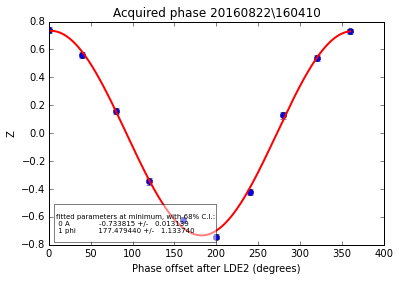

the offset phase changes by (error):  2.5205603191 1.13374015377


In [24]:
reload(pu_ssro)

tomo = 'Z'
Result = pu_ssro.calibrate_LDE_phase(contains = 'phase_offset_after_LDE',do_fit = True,ret = True, 
                                     tomo_basis = tomo,fixed = [0,1,4],show_guess = False, phi0=160,decay = 1e5,freq = 1./360)

offset = Result['params_dict']['phi']
offset_error = Result['error_dict']['phi']

print 'the offset phase changes by (error): ',360 - offset, offset_error

# Full sequence local

reloaded
d:\measuring\data


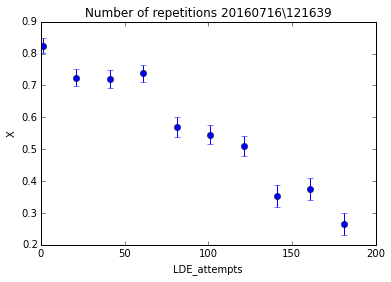

In [56]:
reload(pu_ssro)
pu_ssro.number_of_repetitions(contains = 'full',do_fit = False,fixed=[0,2,5,6],x_only = True)